### Tasks 1-3

In [1]:
# -------------------------------------------------------
# Assignment 2
# Written by Derek Liu - 40057375
# For COMP 472 Section ABIX – Summer 2020
# --------------------------------------------------------

import pandas as pd
import nltk
import string
import io
import math
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report

# model_file is 2018 model data
# test_data is 2019 testing data
# class_probabilities is a dict of the class probabilities
# zero_probs is a dict with P(word | class) if the word does not show up
# output_file is the name of the output model_set
# remove_word_array is an array with words to remove
def naive_bayes(model_file, test_data, class_probabilities, zero_probs, output_file, remove_word_array):
    model = io.open(model_file, "r", encoding="utf-8")
    output = io.open(output_file, "w", encoding="utf-8")
    classes = ['story', 'ask_hn', 'show_hn', 'poll']
    line_counter = 0

    #Key is word and value is [P(w | story), P(w | ask), P(w | show), P(w | post)]
    model_dict = dict()

    for line in model:
        line_array = line.split("  ")
        model_dict[line_array[1]] = {
            'story': float(line_array[3]),
            'ask_hn': float(line_array[5]),
            'show_hn': float(line_array[7]),
            'poll': float(line_array[9])
        }

    for index, row in data.iterrows():
        score = {'story': 0, 'ask_hn': 0, 'show_hn': 0, 'poll': 0}
        if '2019' in row['Created At']:
            tokens = []
            output.write(str(line_counter)+"  ")
            output.write(row['Title']+"  ")
            line_counter += 1
            row['Title'] = row['Title'].replace("√", "")
            row['Title'] = row['Title'].replace(u"\u200B", "")
            row['Title'] = row['Title'].replace(u"\u2082", "2")
            row['Title'] = row['Title'].replace(u"\ue5d4", "")
            row['Title'] = row['Title'].replace("/", " ") # to separate two words with / in between
            if '\'' in row['Title']: row['Title'] = row['Title'].replace("'", "")
            tokens = word_tokenize(row['Title'].lower())
            tokens = [word for word in tokens if word not in removables]
            for post_type in classes:
                score[post_type] = class_probabilities[post_type]
                for token in tokens:
                    # IF STATEMENT HERE HANDLES IF THE WORD DOESN'T SHOW UP
                    if token in remove_word_array: continue
                    elif token in model_dict.keys():
                        score[post_type] = score[post_type]*model_dict[token][post_type]
                    else: score[post_type] = score[post_type]*zero_probs[post_type]
            best_class = max(score, key=score.get)
            output.write(best_class+"  ")
            for post_type in classes:
                output.write(str(score[post_type])+"  ")
            output.write(row['Post Type']+"  ")
            if best_class == row['Post Type']: output.write("right\r")
            else: output.write("wrong\r")

    model.close()
    output.close()

# Read CSV file
data = pd.read_csv("Dhns_2018_2019.csv", encoding='utf-8')

# Read in the removable words
f = io.open("remove_word.txt", "r", encoding="utf-8")
remove_words = [line.replace("\n", "") for line in f.readlines()]
f.close()

# initialize variables
vocab = dict()
story_vocab = dict()
ask_vocab = dict()
show_vocab = dict()
poll_vocab = dict()
story_counter = 0
ask_counter = 0
show_counter = 0
poll_counter = 0
story_row_counter = 0
ask_row_counter = 0
show_row_counter = 0
poll_row_counter = 0
total_model_rows = 0

removables = string.punctuation + '‘' + '’' + '–'

for index, row in data.iterrows():
    tokens = []
    row['Title'] = row['Title'].replace("√", "")
    row['Title'] = row['Title'].replace(u"\u200B", "")
    row['Title'] = row['Title'].replace(u"\u2082", "2")
    row['Title'] = row['Title'].replace(u"\ue5d4", "")
    row['Title'] = row['Title'].replace("/", " ")
    
    if '\'' in row['Title']: row['Title'] = row['Title'].replace("'", "")
    if '2018' in row['Created At']:
        total_model_rows += 1
        tokens = word_tokenize(row['Title'].lower())
        tokens = [word for word in tokens if word not in removables]
        if row['Post Type'] == 'story': story_row_counter+=1
        elif row['Post Type'] == 'ask_hn': ask_row_counter+=1
        elif row['Post Type'] == 'show_hn': show_row_counter+=1
        elif row['Post Type'] == 'poll': poll_row_counter+=1
        for word in tokens:
            if word in vocab:
                vocab[word] = vocab[word] + 1
                if row['Post Type']=='story':
                    story_counter += 1
                    story_vocab[word] += 1
                elif row['Post Type']=='ask_hn':
                    ask_counter += 1
                    ask_vocab[word] += 1
                elif row['Post Type']=='show_hn':
                    show_counter += 1
                    show_vocab[word] += 1
                elif row['Post Type']=='poll':
                    poll_counter += 1
                    poll_vocab[word] += 1
            else:
                vocab[word] = 1
                story_vocab[word] = 0
                ask_vocab[word] = 0
                show_vocab[word] = 0
                poll_vocab[word] = 0
                if row['Post Type']=='story':
                    story_counter += 1
                    story_vocab[word] += 1
                elif row['Post Type']=='ask_hn':
                    ask_counter += 1
                    ask_vocab[word] += 1
                elif row['Post Type']=='show_hn':
                    show_counter += 1
                    show_vocab[word] += 1
                elif row['Post Type']=='poll':
                    poll_counter += 1
                    poll_vocab[word] += 1

for word in remove_words:
    vocab.pop(word, None)
    story_vocab.pop(word, None)
    ask_vocab.pop(word, None)
    show_vocab.pop(word, None)
    poll_vocab.pop(word, None)

line_counter = 1
model_set = io.open("model-2018.txt", "w+", encoding="utf-8")
vocab_file = io.open("vocabulary.txt", "w", encoding="utf-8")
vocab_len = len(vocab)
for word in sorted(vocab.keys()):
    model_set.write(str(line_counter)+"  ")
    model_set.write(word+"  ")

    model_set.write(str(story_vocab[word])+"  ")
    model_set.write(str((story_vocab[word] + 0.5)/(sum(story_vocab.values()) + 0.5*vocab_len))+"  ")

    model_set.write(str(ask_vocab[word])+"  ")
    model_set.write(str((ask_vocab[word] + 0.5)/(sum(ask_vocab.values()) + 0.5*vocab_len))+"  ")

    model_set.write(str(show_vocab[word])+"  ")
    model_set.write(str((show_vocab[word] + 0.5)/(sum(show_vocab.values()) + 0.5*vocab_len))+"  ")

    model_set.write(str(poll_vocab[word])+"  ")
    model_set.write(str((poll_vocab[word] + 0.5)/(sum(poll_vocab.values()) + 0.5*vocab_len)))

    model_set.write("\r")
    line_counter += 1
    vocab_file.write(str(word)+"\r")
model_set.close()
vocab_file.close()

smoothed_probabilities = {
    'story': 0.5/(sum(story_vocab.values()) + 0.5*vocab_len),
    'ask_hn': 0.5/(sum(ask_vocab.values()) + 0.5*vocab_len),
    'show_hn': 0.5/(sum(show_vocab.values()) + 0.5*vocab_len),
    'poll': 0.5/(sum(poll_vocab.values()) + 0.5*vocab_len)
}

class_probs = {
    'story': story_row_counter/total_model_rows,
    'ask_hn': ask_row_counter/total_model_rows,
    'show_hn': show_row_counter/total_model_rows,
    'poll': poll_row_counter/total_model_rows
}

naive_bayes("model-2018.txt", data, class_probs, smoothed_probabilities, "baseline-result.txt", remove_words)

### Experiment 1: Stop-word Filtering

In [3]:
f = io.open("stopwords.txt", "r", encoding="utf-8")
stopwords = [line.replace("\n", "") for line in f.readlines()]
f.close()

f = io.open("remove_word.txt", "r", encoding="utf-8")
remove_words = [line.replace("\n", "") for line in f.readlines()]
f.close()

stopwords = stopwords+remove_words


vocab = dict()
story_vocab = dict()
ask_vocab = dict()
show_vocab = dict()
poll_vocab = dict()
story_counter = 0
ask_counter = 0
show_counter = 0
poll_counter = 0
story_row_counter = 0
ask_row_counter = 0
show_row_counter = 0
poll_row_counter = 0
total_2018_rows = 0

removables = string.punctuation + '‘' + '’' + '–'

for index, row in data.iterrows():
    tokens = []
    row['Title'] = row['Title'].replace("√", "")
    row['Title'] = row['Title'].replace(u"\u200B", "")
    row['Title'] = row['Title'].replace(u"\u2082", "2")
    row['Title'] = row['Title'].replace(u"\ue5d4", "")
    row['Title'] = row['Title'].replace("/", " ")
    if '\'' in row['Title']: row['Title'] = row['Title'].replace("'", "")
    if '2018' in row['Created At']:
        total_2018_rows += 1
        tokens = word_tokenize(row['Title'].lower())
        tokens = [word for word in tokens if word not in removables]
        if row['Post Type'] == 'story': story_row_counter+=1
        elif row['Post Type'] == 'ask_hn': ask_row_counter+=1
        elif row['Post Type'] == 'show_hn': show_row_counter+=1
        elif row['Post Type'] == 'poll': poll_row_counter+=1
        for word in tokens:
            if word in vocab:
                vocab[word] = vocab[word] + 1
                if row['Post Type']=='story':
                    story_counter += 1
                    story_vocab[word] += 1
                elif row['Post Type']=='ask_hn':
                    ask_counter += 1
                    ask_vocab[word] += 1
                elif row['Post Type']=='show_hn':
                    show_counter += 1
                    show_vocab[word] += 1
                elif row['Post Type']=='poll':
                    poll_counter += 1
                    poll_vocab[word] += 1
            else:
                vocab[word] = 1
                story_vocab[word] = 0
                ask_vocab[word] = 0
                show_vocab[word] = 0
                poll_vocab[word] = 0
                if row['Post Type']=='story':
                    story_counter += 1
                    story_vocab[word] += 1
                elif row['Post Type']=='ask_hn':
                    ask_counter += 1
                    ask_vocab[word] += 1
                elif row['Post Type']=='show_hn':
                    show_counter += 1
                    show_vocab[word] += 1
                elif row['Post Type']=='poll':
                    poll_counter += 1
                    poll_vocab[word] += 1

for word in stopwords:
    vocab.pop(word, None)
    story_vocab.pop(word, None)
    ask_vocab.pop(word, None)
    show_vocab.pop(word, None)
    poll_vocab.pop(word, None)

stopwords_file = io.open("stopword-model.txt", "w+", encoding="utf-8")
line_counter = 1
vocab_len = len(vocab)
for word in sorted(vocab.keys()):
    stopwords_file.write(str(line_counter)+"  ")
    stopwords_file.write(word+"  ")

    stopwords_file.write(str(story_vocab[word])+"  ")
    stopwords_file.write(str((story_vocab[word] + 0.5)/(sum(story_vocab.values()) + 0.5*vocab_len))+"  ")

    stopwords_file.write(str(ask_vocab[word])+"  ")
    stopwords_file.write(str((ask_vocab[word] + 0.5)/(sum(ask_vocab.values()) + 0.5*vocab_len))+"  ")

    stopwords_file.write(str(show_vocab[word])+"  ")
    stopwords_file.write(str((show_vocab[word] + 0.5)/(sum(show_vocab.values()) + 0.5*vocab_len))+"  ")

    stopwords_file.write(str(poll_vocab[word])+"  ")
    stopwords_file.write(str((poll_vocab[word] + 0.5)/(sum(poll_vocab.values()) + 0.5*vocab_len)))

    stopwords_file.write("\r")
    line_counter += 1
stopwords_file.close()

smoothed_probabilities_for_stopwords = {
    'story': 0.5/(sum(story_vocab.values()) + 0.5*vocab_len),
    'ask_hn': 0.5/(sum(ask_vocab.values()) + 0.5*vocab_len),
    'show_hn': 0.5/(sum(show_vocab.values()) + 0.5*vocab_len),
    'poll': 0.5/(sum(poll_vocab.values()) + 0.5*vocab_len)
}

class_probs = {
    'story': story_row_counter/total_2018_rows,
    'ask_hn': ask_row_counter/total_2018_rows,
    'show_hn': show_row_counter/total_2018_rows,
    'poll': poll_row_counter/total_2018_rows
}

naive_bayes("stopword-model.txt", data, class_probs, smoothed_probabilities_for_stopwords, "stopword-result.txt", remove_word_array=stopwords)

### Experiment 2: Word Length Filtering

In [4]:
#naive bayes with word length parameters that we'll remove from the model
def naive_bayes_word_length(model_file, test_data, class_probabilities, zero_probs, output_file, remove_word_array=[], word_size1 = 0, word_size2 = 250):
    model = io.open(model_file, "r", encoding="utf-8")
    output = io.open(output_file, "w", encoding="utf-8")
    classes = ['story', 'ask_hn', 'show_hn', 'poll']
    line_counter = 0

    #Same logic as part 1
    model_dict = dict()

    for line in model:
        line_array = line.split("  ")
        model_dict[line_array[1]] = {
            'story': float(line_array[3]),
            'ask_hn': float(line_array[5]),
            'show_hn': float(line_array[7]),
            'poll': float(line_array[9])
        }

    for index, row in data.iterrows():
        score = {'story': 0, 'ask_hn': 0, 'show_hn': 0, 'poll': 0}
        if '2019' in row['Created At']:
            tokens = []
            output.write(str(line_counter)+"  ")
            output.write(row['Title']+"  ")
            line_counter += 1
            row['Title'] = row['Title'].replace("√", "")
            row['Title'] = row['Title'].replace(u"\u200B", "")
            row['Title'] = row['Title'].replace(u"\u2082", "2")
            row['Title'] = row['Title'].replace(u"\ue5d4", "")
            row['Title'] = row['Title'].replace("/", " ") # to separate two words with / in between
            if '\'' in row['Title']: row['Title'] = row['Title'].replace("'", "")
            tokens = word_tokenize(row['Title'].lower())
            tokens = [word for word in tokens if word not in removables]
            for post_type in classes:
                score[post_type] = class_probabilities[post_type]
                for token in tokens:
                    #skip words in remove words and word size
                    if token in remove_word_array: continue
                    elif len(token) <= word_size1: continue
                    elif len(token) >= word_size2: continue
                    elif token in model_dict.keys():
                        score[post_type] = score[post_type]*model_dict[token][post_type]
                    else: score[post_type] = score[post_type]*zero_probs[post_type]
            best_class = max(score, key=score.get)
            output.write(best_class+"  ")
            for post_type in classes:
                output.write(str(score[post_type])+"  ")
            output.write(row['Post Type']+"  ")
            if best_class == row['Post Type']: output.write("right\r")
            else: output.write("wrong\r")

    model.close()
    output.close()

data = pd.read_csv("Dhns_2018_2019.csv", encoding='utf-8')
f = io.open("remove_word.txt", "r", encoding="utf-8")
remove_words = [line.replace("\n", "") for line in f.readlines()]
f.close()

vocab = dict()
story_vocab = dict()
ask_vocab = dict()
show_vocab = dict()
poll_vocab = dict()
story_counter = 0
ask_counter = 0
show_counter = 0
poll_counter = 0
story_row_counter = 0
ask_row_counter = 0
show_row_counter = 0
poll_row_counter = 0
total_2018_rows = 0

removables = string.punctuation + '‘' + '’' + '–'

for index, row in data.iterrows():
    tokens = []
    row['Title'] = row['Title'].replace("√", "")
    row['Title'] = row['Title'].replace(u"\u200B", "")
    row['Title'] = row['Title'].replace(u"\u2082", "2")
    row['Title'] = row['Title'].replace(u"\ue5d4", "")
    row['Title'] = row['Title'].replace("/", " ")
    if '\'' in row['Title']: row['Title'] = row['Title'].replace("'", "")
    if '2018' in row['Created At']:
        total_2018_rows += 1
        tokens = word_tokenize(row['Title'].lower())
        tokens = [word for word in tokens if word not in removables]
        if row['Post Type'] == 'story': story_row_counter+=1
        elif row['Post Type'] == 'ask_hn': ask_row_counter+=1
        elif row['Post Type'] == 'show_hn': show_row_counter+=1
        elif row['Post Type'] == 'poll': poll_row_counter+=1
        for word in tokens:
            if word in vocab:
                vocab[word] = vocab[word] + 1
                if row['Post Type']=='story':
                    story_counter += 1
                    story_vocab[word] += 1
                elif row['Post Type']=='ask_hn':
                    ask_counter += 1
                    ask_vocab[word] += 1
                elif row['Post Type']=='show_hn':
                    show_counter += 1
                    show_vocab[word] += 1
                elif row['Post Type']=='poll':
                    poll_counter += 1
                    poll_vocab[word] += 1
            elif len(word) <= 2 or len(word) >= 9: continue
            else:
                vocab[word] = 1
                story_vocab[word] = 0
                ask_vocab[word] = 0
                show_vocab[word] = 0
                poll_vocab[word] = 0
                if row['Post Type']=='story':
                    story_counter += 1
                    story_vocab[word] += 1
                elif row['Post Type']=='ask_hn':
                    ask_counter += 1
                    ask_vocab[word] += 1
                elif row['Post Type']=='show_hn':
                    show_counter += 1
                    show_vocab[word] += 1
                elif row['Post Type']=='poll':
                    poll_counter += 1
                    poll_vocab[word] += 1

for word in remove_words:
    vocab.pop(word, None)
    story_vocab.pop(word, None)
    ask_vocab.pop(word, None)
    show_vocab.pop(word, None)
    poll_vocab.pop(word, None)

wordlength_model = io.open("wordlength-model.txt", "w+", encoding="utf-8")
line_counter = 1
vocab_len = len(vocab)
for word in sorted(vocab.keys()):
    wordlength_model.write(str(line_counter)+"  ")
    wordlength_model.write(word+"  ")

    wordlength_model.write(str(story_vocab[word])+"  ")
    wordlength_model.write(str((story_vocab[word] + 0.5)/(sum(story_vocab.values()) + 0.5*vocab_len))+"  ")

    wordlength_model.write(str(ask_vocab[word])+"  ")
    wordlength_model.write(str((ask_vocab[word] + 0.5)/(sum(ask_vocab.values()) + 0.5*vocab_len))+"  ")

    wordlength_model.write(str(show_vocab[word])+"  ")
    wordlength_model.write(str((show_vocab[word] + 0.5)/(sum(show_vocab.values()) + 0.5*vocab_len))+"  ")

    wordlength_model.write(str(poll_vocab[word])+"  ")
    wordlength_model.write(str((poll_vocab[word] + 0.5)/(sum(poll_vocab.values()) + 0.5*vocab_len)))

    wordlength_model.write("\r")
    line_counter += 1
wordlength_model.close()

smoothed_probabilities_wordlength = {
    'story': 0.5/(sum(story_vocab.values()) + 0.5*vocab_len),
    'ask_hn': 0.5/(sum(ask_vocab.values()) + 0.5*vocab_len),
    'show_hn': 0.5/(sum(show_vocab.values()) + 0.5*vocab_len),
    'poll': 0.5/(sum(poll_vocab.values()) + 0.5*vocab_len)
}

class_probs = {
    'story': story_row_counter/total_2018_rows,
    'ask_hn': ask_row_counter/total_2018_rows,
    'show_hn': show_row_counter/total_2018_rows,
    'poll': poll_row_counter/total_2018_rows
}

naive_bayes_word_length("wordlength-model.txt", data, class_probs, smoothed_probabilities_wordlength, "wordlength-result.txt", remove_word_array=remove_words, word_size1 = 2, word_size2 = 9)

### Experiment 3: Infrequent Word Filtering - Frequency numbers

57
              precision    recall  f1-score   support

      ask_hn       0.50      0.50      0.50         2
        poll       0.20      0.50      0.29         2
     show_hn       0.67      0.67      0.67         3
       story       0.00      0.00      0.00         3

    accuracy                           0.40        10
   macro avg       0.34      0.42      0.36        10
weighted avg       0.34      0.40      0.36        10

10
              precision    recall  f1-score   support

      ask_hn       1.00      0.50      0.67         2
        poll       0.25      1.00      0.40         2
     show_hn       1.00      0.33      0.50         3
       story       0.00      0.00      0.00         3

    accuracy                           0.40        10
   macro avg       0.56      0.46      0.39        10
weighted avg       0.55      0.40      0.36        10

4
              precision    recall  f1-score   support

      ask_hn       0.00      0.00      0.00         2
        poll 

C:\Users\Derik_PC\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ZeroDivisionError: float division by zero

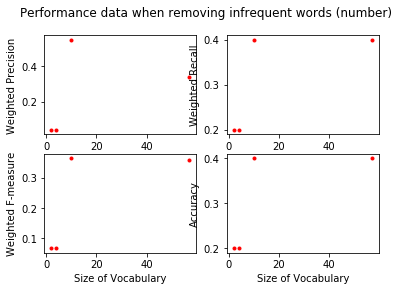

In [5]:
#naive_bayes without an output file and returns an sklearn metrics classification report instead
def naive_bayes_infrequent_word(model_file, test_data, class_probabilities, zero_probs, remove_word_array):
    model = io.open(model_file, "r", encoding="utf-8")
    classes = ['story', 'ask_hn', 'show_hn', 'poll']
    line_counter = 0

    model_dict = dict()

    for line in model:
        line_array = line.split("  ")
        model_dict[line_array[1]] = {
            'story': float(line_array[3]),
            'ask_hn': float(line_array[5]),
            'show_hn': float(line_array[7]),
            'poll': float(line_array[9])
        }
    target = []
    guesses = []
    for index, row in data.iterrows():
        score = {'story': 0, 'ask_hn': 0, 'show_hn': 0, 'poll': 0}
        if '2019' in row['Created At']:
            tokens = []
            line_counter += 1
            row['Title'] = row['Title'].replace("√", "")
            row['Title'] = row['Title'].replace(u"\u200B", "")
            row['Title'] = row['Title'].replace(u"\u2082", "2")
            row['Title'] = row['Title'].replace(u"\ue5d4", "")
            row['Title'] = row['Title'].replace("/", " ") # to separate two words with / in between
            if '\'' in row['Title']: row['Title'] = row['Title'].replace("'", "")
            tokens = word_tokenize(row['Title'].lower())
            tokens = [word for word in tokens if word not in removables]
            for post_type in classes:
                score[post_type] = class_probabilities[post_type]
                for token in tokens:
                    if token in remove_word_array: continue
                    elif token in model_dict.keys():
                        score[post_type] = score[post_type]*model_dict[token][post_type]
                    else: score[post_type] = score[post_type]*zero_probs[post_type]
            guesses.append(max(score, key=score.get))
            target.append(row['Post Type'])
    model.close()
    print(classification_report(target, guesses))
    return classification_report(target, guesses, output_dict=True)


data = pd.read_csv("Dhns_2018_2019.csv", encoding='utf-8')
f = io.open("remove_word.txt", "r", encoding="utf-8")
remove_words = [line.replace("\n", "") for line in f.readlines()]
f.close()


vocab = dict()
story_vocab = dict()
ask_vocab = dict()
show_vocab = dict()
poll_vocab = dict()
story_counter = 0
ask_counter = 0
show_counter = 0
poll_counter = 0
story_row_counter = 0
ask_row_counter = 0
show_row_counter = 0
poll_row_counter = 0
total_2018_rows = 0

removables = string.punctuation + '‘' + '’' + '–'

for index, row in data.iterrows():
    tokens = []
    row['Title'] = row['Title'].replace("√", "")
    row['Title'] = row['Title'].replace(u"\u200B", "")
    row['Title'] = row['Title'].replace(u"\u2082", "2")
    row['Title'] = row['Title'].replace(u"\ue5d4", "")
    row['Title'] = row['Title'].replace("/", " ")
    if '\'' in row['Title']: row['Title'] = row['Title'].replace("'", "")
    if '2018' in row['Created At']:
        total_2018_rows += 1
        tokens = word_tokenize(row['Title'].lower())
        tokens = [word for word in tokens if word not in removables]
        if row['Post Type'] == 'story': story_row_counter+=1
        elif row['Post Type'] == 'ask_hn': ask_row_counter+=1
        elif row['Post Type'] == 'show_hn': show_row_counter+=1
        elif row['Post Type'] == 'poll': poll_row_counter+=1
        for word in tokens:
            if word in vocab:
                vocab[word] = vocab[word] + 1
                if row['Post Type']=='story':
                    story_counter += 1
                    story_vocab[word] += 1
                elif row['Post Type']=='ask_hn':
                    ask_counter += 1
                    ask_vocab[word] += 1
                elif row['Post Type']=='show_hn':
                    show_counter += 1
                    show_vocab[word] += 1
                elif row['Post Type']=='poll':
                    poll_counter += 1
                    poll_vocab[word] += 1
            else:
                vocab[word] = 1
                story_vocab[word] = 0
                ask_vocab[word] = 0
                show_vocab[word] = 0
                poll_vocab[word] = 0
                if row['Post Type']=='story':
                    story_counter += 1
                    story_vocab[word] += 1
                elif row['Post Type']=='ask_hn':
                    ask_counter += 1
                    ask_vocab[word] += 1
                elif row['Post Type']=='show_hn':
                    show_counter += 1
                    show_vocab[word] += 1
                elif row['Post Type']=='poll':
                    poll_counter += 1
                    poll_vocab[word] += 1

#remove words from "remove_word.txt"
for word in remove_words:
    vocab.pop(word, None)
    story_vocab.pop(word, None)
    ask_vocab.pop(word, None)
    show_vocab.pop(word, None)
    poll_vocab.pop(word, None)

vocab_copy = vocab.copy()
story_vocab_copy = story_vocab.copy()
ask_vocab_copy = ask_vocab.copy()
show_vocab_copy = show_vocab.copy()
poll_vocab_copy = poll_vocab.copy()

fig, ((precision, recall), (f_measure, accuracy)) = plt.subplots(2, 2)
fig.suptitle('Performance data when removing infrequent words (number)')

precision.set(xlabel='Size of Vocabulary', ylabel='Weighted Precision')
recall.set(xlabel='Size of Vocabulary', ylabel='Weighted Recall')
f_measure.set(xlabel='Size of Vocabulary', ylabel='Weighted F-measure')
accuracy.set(xlabel='Size of Vocabulary', ylabel='Accuracy')

infrequent_word_order = [1, 5, 10, 15, 20]
for limit in infrequent_word_order:
    # this dictionary holds words with value or less
    infrequent_vocabulary = {k: v for k, v in vocab.items() if v <= limit}

    for word in infrequent_vocabulary:
        vocab_copy.pop(word, None)
        story_vocab_copy.pop(word, None)
        ask_vocab_copy.pop(word, None)
        show_vocab_copy.pop(word, None)
        poll_vocab_copy.pop(word, None)

    line_counter = 1
    frequency_model = io.open("frequency-model.txt", "w+", encoding="utf-8")
    vocab_len = len(vocab_copy)
    for word in sorted(vocab_copy.keys()):
        frequency_model.write(str(line_counter)+"  ")
        frequency_model.write(word+"  ")

        frequency_model.write(str(story_vocab_copy[word])+"  ")
        frequency_model.write(str((story_vocab_copy[word] + 0.5)/(sum(story_vocab_copy.values()) + 0.5*vocab_len))+"  ")

        frequency_model.write(str(ask_vocab_copy[word])+"  ")
        frequency_model.write(str((ask_vocab_copy[word] + 0.5)/(sum(ask_vocab_copy.values()) + 0.5*vocab_len))+"  ")

        frequency_model.write(str(show_vocab_copy[word])+"  ")
        frequency_model.write(str((show_vocab_copy[word] + 0.5)/(sum(show_vocab_copy.values()) + 0.5*vocab_len))+"  ")

        frequency_model.write(str(poll_vocab_copy[word])+"  ")
        frequency_model.write(str((poll_vocab_copy[word] + 0.5)/(sum(poll_vocab_copy.values()) + 0.5*vocab_len)))

        frequency_model.write("\r")
        line_counter += 1
    frequency_model.close()

    print(vocab_len)
    smoothed_word_probabilities_infrequent = {
        'story': 0.5/(sum(story_vocab_copy.values()) + 0.5*vocab_len),
        'ask_hn': 0.5/(sum(ask_vocab_copy.values()) + 0.5*vocab_len),
        'show_hn': 0.5/(sum(show_vocab_copy.values()) + 0.5*vocab_len),
        'poll': 0.5/(sum(poll_vocab_copy.values()) + 0.5*vocab_len)
    }

    class_probs = {
        'story': story_row_counter/total_2018_rows,
        'ask_hn': ask_row_counter/total_2018_rows,
        'show_hn': show_row_counter/total_2018_rows,
        'poll': poll_row_counter/total_2018_rows
    }
    classes = ['story', 'ask_hn', 'show_hn', 'poll']

    report = naive_bayes_infrequent_word("frequency-model.txt", data, class_probs, smoothed_word_probabilities_infrequent, remove_words)
    totaldata = 0
    for post_type in classes:
        if post_type in report.keys():
            totaldata += report[post_type]['support']
    weighted_precision = 0
    weighted_recall = 0
    weighted_f_measure = 0
    for post_type in classes:
        if post_type in report.keys():
            weighted_precision += report[post_type]['precision'] * (report[post_type]['support']/totaldata)
            weighted_recall += report[post_type]['recall'] * (report[post_type]['support']/totaldata)
            weighted_f_measure += report[post_type]['f1-score'] * (report[post_type]['support']/totaldata)
    precision.plot(vocab_len, weighted_precision, '.r-')
    recall.plot(vocab_len, weighted_recall, '.r-')
    f_measure.plot(vocab_len, weighted_f_measure, '.r-')
    accuracy.plot(vocab_len, report['accuracy'], '.r-')

plt.show()

### Experiment 3: Infrequent Word Filtering - Frequency percentages

C:\Users\Derik_PC\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      ask_hn       0.00      0.00      0.00         2
        poll       0.20      1.00      0.33         2
     show_hn       0.00      0.00      0.00         3
       story       0.00      0.00      0.00         3

    accuracy                           0.20        10
   macro avg       0.05      0.25      0.08        10
weighted avg       0.04      0.20      0.07        10

              precision    recall  f1-score   support

      ask_hn       0.00      0.00      0.00         2
        poll       0.20      1.00      0.33         2
     show_hn       0.00      0.00      0.00         3
       story       0.00      0.00      0.00         3

    accuracy                           0.20        10
   macro avg       0.05      0.25      0.08        10
weighted avg       0.04      0.20      0.07        10

              precision    recall  f1-score   support

      ask_hn       0.20      1.00      0.33         2
        poll       0.

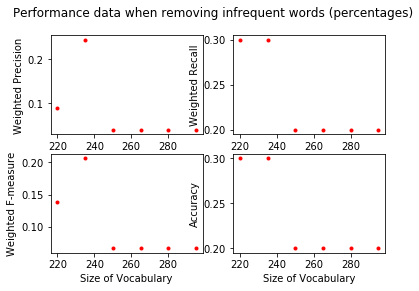

In [6]:
fig, ((precision, recall), (f_measure, accuracy)) = plt.subplots(2, 2)
fig.suptitle('Performance data when removing infrequent words (percentages)')

precision.set(xlabel='Size of Vocabulary', ylabel='Weighted Precision')
recall.set(xlabel='Size of Vocabulary', ylabel='Weighted Recall')
f_measure.set(xlabel='Size of Vocabulary', ylabel='Weighted F-measure')
accuracy.set(xlabel='Size of Vocabulary', ylabel='Accuracy')

vocab = {k: v for k, v in sorted(vocab.items(), key=lambda item: item[1])}
outliers = math.floor(len(vocab)*5/100)
for i in range(6):
    for i in range(outliers):
        popped_word = list(vocab.keys())[-1]
        vocab.pop(popped_word)
        story_vocab.pop(popped_word)
        ask_vocab.pop(popped_word)
        show_vocab.pop(popped_word)
        poll_vocab.pop(popped_word)

    line_counter = 1
    frequency_model_percent = io.open("frequency-model-percentages.txt", "w+", encoding="utf-8")
    vocab_len = len(vocab)
    for word in sorted(vocab.keys()):
        frequency_model_percent.write(str(line_counter)+"  ")
        frequency_model_percent.write(word+"  ")

        frequency_model_percent.write(str(story_vocab[word])+"  ")
        frequency_model_percent.write(str((story_vocab[word] + 0.5)/(sum(story_vocab.values()) + 0.5*vocab_len))+"  ")

        frequency_model_percent.write(str(ask_vocab[word])+"  ")
        frequency_model_percent.write(str((ask_vocab[word] + 0.5)/(sum(ask_vocab.values()) + 0.5*vocab_len))+"  ")

        frequency_model_percent.write(str(show_vocab[word])+"  ")
        frequency_model_percent.write(str((show_vocab[word] + 0.5)/(sum(show_vocab.values()) + 0.5*vocab_len))+"  ")

        frequency_model_percent.write(str(poll_vocab[word])+"  ")
        frequency_model_percent.write(str((poll_vocab[word] + 0.5)/(sum(poll_vocab.values()) + 0.5*vocab_len)))

        frequency_model_percent.write("\r")
        line_counter += 1
    frequency_model_percent.close()

    smoothed_word_probabilities_infrequent_percent = {
        'story': 0.5/(sum(story_vocab.values()) + 0.5*vocab_len),
        'ask_hn': 0.5/(sum(ask_vocab.values()) + 0.5*vocab_len),
        'show_hn': 0.5/(sum(show_vocab.values()) + 0.5*vocab_len),
        'poll': 0.5/(sum(poll_vocab.values()) + 0.5*vocab_len)
    }

    class_probs = {
        'story': story_row_counter/total_2018_rows,
        'ask_hn': ask_row_counter/total_2018_rows,
        'show_hn': show_row_counter/total_2018_rows,
        'poll': poll_row_counter/total_2018_rows
    }
    classes = ['story', 'ask_hn', 'show_hn', 'poll']

    report = naive_bayes_infrequent_word("frequency-model.txt", data, class_probs, smoothed_word_probabilities_infrequent_percent, remove_words)
    totaldata = 0
    for post_type in classes:
        if post_type in report.keys():
            totaldata += report[post_type]['support']
    weighted_precision = 0
    weighted_recall = 0
    weighted_f_measure = 0
    for post_type in classes:
        if post_type in report.keys():
            weighted_precision += report[post_type]['precision'] * (report[post_type]['support']/totaldata)
            weighted_recall += report[post_type]['recall'] * (report[post_type]['support']/totaldata)
            weighted_f_measure += report[post_type]['f1-score'] * (report[post_type]['support']/totaldata)
    precision.plot(vocab_len, weighted_precision, '.r-')
    recall.plot(vocab_len, weighted_recall, '.r-')
    f_measure.plot(vocab_len, weighted_f_measure, '.r-')
    accuracy.plot(vocab_len, report['accuracy'], '.r-')

plt.show()